# Análisis Predictivo Quebrado de Granos

En el siguiente trabajo se tomaron datos de una empresa que recibe granos con cierta humedad los cuales se procesan para su posterior comercialización. En este caso se realizó un modelo predictivo para intentar predecir el valor de 'quebrado' de granos que ocurre durante los procesos productivos.

# Importamos las librerías que se utilizarán

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Vinculamos Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importamos los datos desde el drive

path = "/content/drive/MyDrive/Práctica/Granos/cabecera_limpia_svaried.csv"
granos = pd.read_csv(path, encoding= 'unicode_escape') 

granos 

,Humedad Ingreso,Humedad Salida,Enteros Entrada Con Reposo,Enteros salida con Reposo,Quebrado
0,16.10,12.82,62.49,62.39,0.10
1,28.06,16.40,62.41,61.76,0.65
2,26.95,16.94,64.88,64.20,0.68
3,17.42,13.24,63.72,61.93,1.79
4,27.84,16.39,64.79,61.53,3.26
...,...,...,...,...,...
308,24.66,16.09,64.01,62.04,1.97
309,16.13,13.00,64.05,63.88,0.17
310,20.53,14.02,65.30,59.82,5.48
311,15.81,13.01,63.51,62.71,0.80


In [ ]:
# Realizamos una descripción estadística de los datos

granos.describe()

,Humedad Ingreso,Humedad Salida,Enteros Entrada Con Reposo,Enteros salida con Reposo,Quebrado
count,313.000000,313.000000,313.000000,313.000000,313.000000
mean,21.136358,14.281214,63.442332,61.855559,1.760543
std,4.120145,1.749919,1.875291,2.070711,1.712129
min,14.460000,12.030000,56.100000,53.700000,-0.390000
25%,17.400000,12.910000,62.580000,60.960000,0.480000
50%,21.230000,13.270000,63.720000,62.150000,1.410000
75%,24.660000,15.530000,64.730000,63.190000,2.580000
max,29.520000,18.370000,67.320000,66.660000,8.940000


**Se chequea rapidamente la distribucion conjunta de las columnas de los datos.**

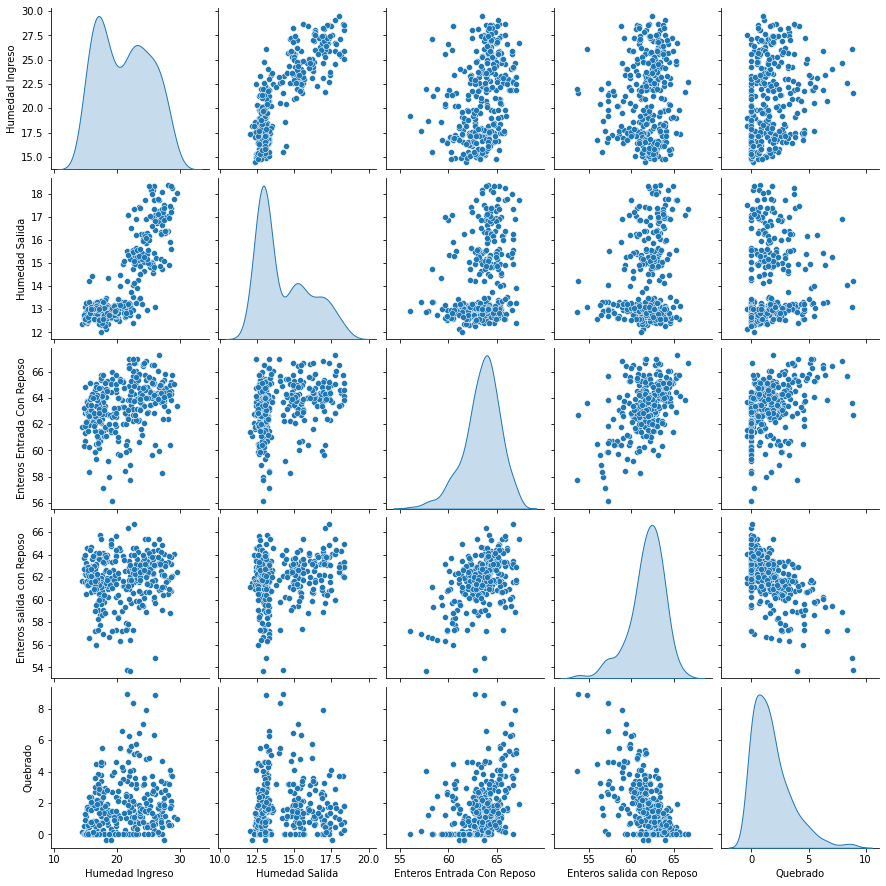

In [ ]:
sns.pairplot(granos, diag_kind="kde")

#Preprocesamiento

#Detecta datos faltantes y elimina filas

Se corrobora la existencia de datos nulos o faltantes.

In [ ]:
granos.isnull().sum()

Humedad Ingreso               0
Humedad Salida                0
Enteros Entrada Con Reposo    0
Enteros salida con Reposo     0
Quebrado                      0
dtype: int64

Para este caso no existen valores faltantes.

**Seleccionamos la variable a predecir**

Para este caso la variable objetivo es "Quebrado"

In [ ]:
y = granos.Quebrado

**Seleccionamos las "Features"**

En este momento elegimos cuales son las variables que se utilizaran para realizar la predicción en el modelo. Se puede trabajar con todas las variables o algunas veces se seleccionan las que se consideran más relevantes.
Para este caso se utilizan todas las variables.

In [ ]:
granos_features = ['Humedad Ingreso', 'Humedad Salida', 'Enteros Entrada Con Reposo', 'Enteros salida con Reposo']

In [ ]:
# Por convención se llama X a estás características

X = granos[granos_features]

#**Se Construye el Modelo**

Para ello se utiliza la librería **scikit-learn**. Al realizar la codificación es escrita como **sklearn**.

Los pasos que se utilizan para construir el
The steps to building and using a model are:

**Definición:** Que tipo de modelo se usará? Se definen los parámetros del modelo seleccionado.

**Fit (Ajuste):** Se "capturan" patrones de los datos provistos. Es la parte esencial del modelado.

**Predicción:** Es la predicción literal del modelo.

**Evaluación:** Se determina la precisión del modelo con los datos de validación.

Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

Se dividen los datos en dos conjuntos, uno de entrenamiento y otro de validación del modelo. De esta menera se corrobora que el modelo es válido para predecir con nuevos datos. Además se calcula el error cuadrático medio (MAE) como medida cuantitativa.

## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Se divide los datos en un conjunto de entrenamiento y de validación, tanto para las varibles de predicción como para la variables objetivo
# La división sebasa en un generador númerico aleatorio (random number generator), el cual garantiza que se obtiene la misma división cada vez que se ejecuta el script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Se Define el Modelo, en este caso también se define el random_state para el modelo así se garantiza obtener el mismo resultado cada vez que se corre el mismo
granos_model = DecisionTreeRegressor(random_state=1)

# Fiteo o Ajuste del Modelo
granos_model.fit(train_X, train_y)

# Realiza la predicción con los datos de validación
val_predictions = granos_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

0.41189873417721506


## **Random Forests**

Se realiza el análisis con la utilización del modelo de Random Forests a fin de verificar si este modelo da mejores predicciones.
Este modelo se sustenta en el uso de varios árboles, y realiza la predicción promediando la predicción de cada árbol.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
arch_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, arch_preds))

0.2678999999999999


**Conclusión**

En función de los resultados obtenidos (menor MAE) se concluye que el modelo a utilizar para las futuras predicciones es el de Random Forests.